In [1]:
#for development of the gridmap
import sys, os
#path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname(__file__), os.path.pardir, 'dir1')))
#print(os.getcwd())
parent_path = os.path.normpath(os.path.abspath(os.path.join(os.getcwd(), os.path.pardir)))
#print(path2add)
sys.path.append(parent_path)
sys.path.append(os.path.normpath(os.path.join(parent_path,"gyrii")))

import json
import yaml

    
def dict_array_upend(mydict,key,elem):
    if key not in mydict:
        mydict[key]=[]
    mydict[key.append(elem)]

def load_sensor_log_file(fname):
    response=[]
    first_timestamp=0
    f=open(fname,'r')
    for line in f.readlines():        
        dat=json.loads(line)
        timestamp=dat["timestamp"]-first_timestamp
        response.append(dat)
        if first_timestamp==0:                        
            first_timestamp=timestamp
    return response,first_timestamp
        
#sensor_log,first_timestamp=load_sensor_log_file("../logs/sensor_log_20210326-143448.txt")
sensor_log,first_timestamp=load_sensor_log_file("../logs/sensor_log_20210409-141619.txt")

In [2]:
from Gyrus import Gyrus
from TimeSeries import TimeSeries
import numpy as np

class PosePlotter(Gyrus):
    def __init__(self):
        self.x_dataseries=TimeSeries(title="Pose X",ylabel="X Position (m)")
        self.x_unc_dataseries=TimeSeries(title="Pose X Unc",ylabel="X Position Uncertainty (m)")
        self.y_dataseries=TimeSeries(title="Pose Y",ylabel="X Position (m)")
        self.y_unc_dataseries=TimeSeries(title="Pose Y Unc",ylabel="X Position Uncertainty (m)")
        self.theta_dataseries=TimeSeries(title="Pose Theta",ylabel="Angle (radians)")
        self.theta_unc_dataseries=TimeSeries(title="Pose Theta",ylabel="Angle Uncertainty (radians)")
        self.lx_dataseries=TimeSeries(title="Pose X",ylabel="X Position Lidar (m)")
        self.lx_unc_dataseries=TimeSeries(title="Pose X Unc",ylabel="X Lidar Position Uncertainty (m)")
        self.ly_dataseries=TimeSeries(title="Pose Y",ylabel="X Position Lidar (m)")
        self.ly_unc_dataseries=TimeSeries(title="Pose Y Unc",ylabel="X Lidar Position Uncertainty (m)")
        self.ltheta_dataseries=TimeSeries(title="Pose Theta",ylabel="Angle (radians)")
        self.ltheta_unc_dataseries=TimeSeries(title="Pose Theta",ylabel="Angle Uncertainty (radians)")
        self.ctheta_dataseries=TimeSeries(title="Pose Theta",ylabel="Angle (radians)")
        self.ctheta_unc_dataseries=TimeSeries(title="Pose Theta",ylabel="Angle Uncertainty (radians)")    
        self.bfield_times=[]
        self.bfields=[]
        
        
        
    def read_message(self,message):
        if "latest_pose" in message and "timestamp" in message:
            self.x_dataseries.append(message["timestamp"],message["latest_pose"]["vals"][0])
            self.x_unc_dataseries.append(message["timestamp"],np.sqrt(message["latest_pose"]["covariance"][0][0]))
            self.y_dataseries.append(message["timestamp"],message["latest_pose"]["vals"][1])
            self.y_unc_dataseries.append(message["timestamp"],np.sqrt(message["latest_pose"]["covariance"][1][1]))
            self.theta_dataseries.append(message["timestamp"],message["latest_pose"]["vals"][2])
            self.theta_unc_dataseries.append(message["timestamp"],np.sqrt(message["latest_pose"]["covariance"][2][2]))
        if "notes" in message and message["notes"]=="lidar":
            self.lx_dataseries.append(message["timestamp"],message["pose_measurement"]["vals"][0])
            self.lx_unc_dataseries.append(message["timestamp"],np.sqrt(message["pose_measurement"]["covariance"][0][0]))
            self.ly_dataseries.append(message["timestamp"],message["pose_measurement"]["vals"][1])
            self.ly_unc_dataseries.append(message["timestamp"],np.sqrt(message["pose_measurement"]["covariance"][1][1]))
            self.ltheta_dataseries.append(message["timestamp"],message["pose_measurement"]["vals"][2])
            self.ltheta_unc_dataseries.append(message["timestamp"],np.sqrt(message["pose_measurement"]["covariance"][2][2]))
        if "notes" in message and message["notes"]=="compass":
            self.ctheta_dataseries.append(message["timestamp"],message["pose_measurement"]["vals"][2])
            self.ctheta_unc_dataseries.append(message["timestamp"],np.sqrt(message["pose_measurement"]["covariance"][2][2]))
        if "magnetometer/b_field" in message:
            self.bfield_times.append(message["timestamp"])
            self.bfields.append(np.array(message["magnetometer/b_field"])    )      
        return []


In [3]:
plotters={}
plotters["pose"]=PosePlotter()

gyrii=[]

for key in plotters:
    gyrii.append(plotters[key])

start_timestamp=sensor_log[0]["timestamp"]
inspect_messagename="none"

remove_messages=["po"]

for i in range(len(sensor_log)):    
    for m in remove_messages:
        if m in sensor_log[i]:            
            #print("removing {}".format(sensor_log[i]))            
            sensor_log[i].pop(m,None)
            #print("removing {}".format(sensor_log[i]))                      
    start_message=sensor_log[i]
    start_message["timestamp"]-=start_timestamp #rescale time to zero at start
    waiting_messages=[ start_message ]    
    while len(waiting_messages)!=0:
        on_message=waiting_messages.pop()
        if inspect_messagename in on_message:
            print(on_message)
        for g in gyrii:
            waiting_messages.extend(g.read_message(on_message))

C:\Users\grybk\projects\gratbot\gratbot_client\TimeSeries.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\grybk\projects\gratbot\gratbot_client\TimeSeries.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\grybk\projects\gratbot\gratbot_client\TimeSeries.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


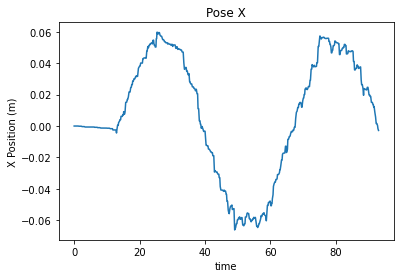

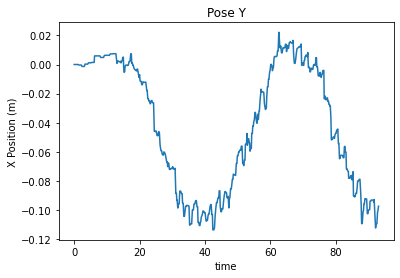

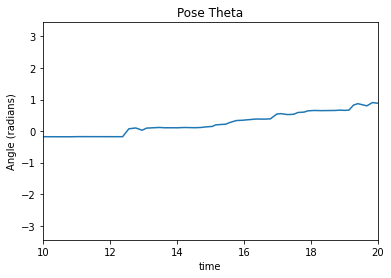

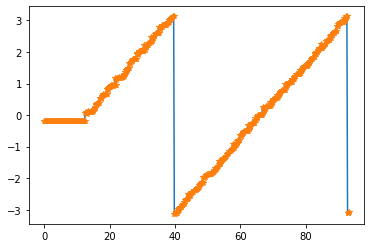

C:\Users\grybk\projects\gratbot\gratbot_client\TimeSeries.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\grybk\projects\gratbot\gratbot_client\TimeSeries.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


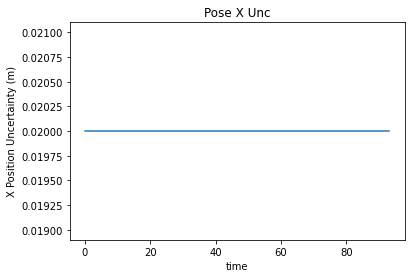

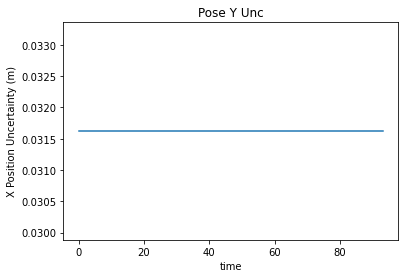

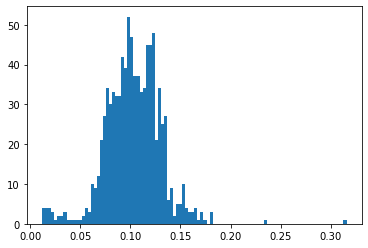

In [11]:
import matplotlib.pyplot as plt



plotters["pose"].x_dataseries.plot()
plotters["pose"].y_dataseries.plot()
plotters["pose"].theta_dataseries.plot(start_time=10,stop_time=20)
plt.figure()
#plt.xlim(10,14)
plt.plot(plotters["pose"].theta_dataseries.times,plotters["pose"].theta_dataseries.data)
plt.plot(plotters["pose"].theta_dataseries.times,plotters["pose"].theta_dataseries.data,'*')
plt.show()
plotters["pose"].x_unc_dataseries.plot()
plotters["pose"].y_unc_dataseries.plot()
db=[ plotters["pose"].bfield_times[i+1]-plotters["pose"].bfield_times[i] for i in range(len(plotters["pose"].bfield_times)-1)]
plt.figure()
plt.hist(db,bins=100)
plt.show()

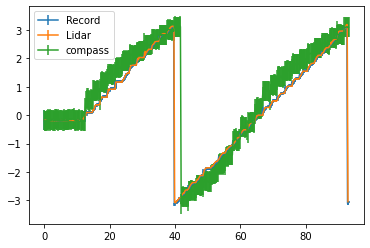

In [5]:
fig, ax = plt.subplots()
#plt.plot(plotters["pose"].x_dataseries.times,plotters["pose"].x_dataseries.data,label="Record")
plt.errorbar(plotters["pose"].theta_dataseries.times,plotters["pose"].theta_dataseries.data,yerr=plotters["pose"].theta_unc_dataseries.data,label="Record")
plt.errorbar(plotters["pose"].ltheta_dataseries.times,plotters["pose"].ltheta_dataseries.data,yerr=plotters["pose"].ltheta_unc_dataseries.data,label="Lidar")
#plt.xlim([70,100])
plt.errorbar(plotters["pose"].ctheta_dataseries.times,plotters["pose"].ctheta_dataseries.data,yerr=plotters["pose"].ctheta_unc_dataseries.data,label="compass")

#plt.ylim([0,0.5])
plt.legend()

plt.show()

[-16.91026016 123.80882783 -99.32768196]


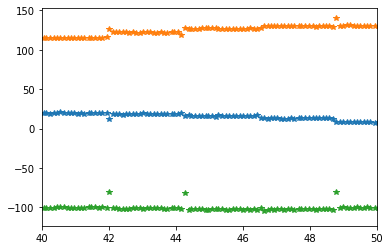

In [13]:
fig, ax = plt.subplots()
plt.xlim(40,50)
plt.plot(plotters["pose"].bfield_times,plotters["pose"].bfields,'*')
print(plotters["pose"].bfields[0])
plt.show()

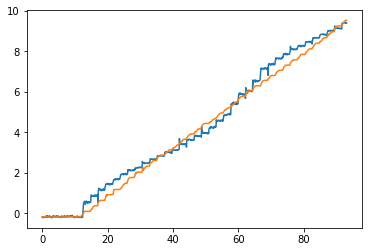

In [7]:
def bfield_to_heading(bfields,xcorrection,ycorrection,A):
    corr=np.outer(np.ones(len(bfields)),np.array([xcorrection,ycorrection,0]))
    bfields_prime=np.array(bfields)-corr   
    thetas=-np.arctan2(bfields_prime[:,0],bfields_prime[:,1])
    result=thetas+A*np.sin(thetas)
    return result


plotters["pose"].ltheta_dataseries.append(plotters["pose"].bfield_times[-1],plotters["pose"].ltheta_dataseries.data[-1])
lthetadata=plotters["pose"].ltheta_dataseries.find_elems_just_after_times(plotters["pose"].bfield_times)
fig, ax = plt.subplots()
plt.plot(plotters["pose"].bfield_times,np.unwrap(bfield_to_heading(plotters["pose"].bfields,-5.63,119.74,0)-1.4))
#plt.plot(plotters["pose"].bfield_times,bfield_to_heading(plotters["pose"].bfields,0,0,0))
#plt.errorbar(plotters["pose"].ltheta_dataseries.times,np.unwrap(plotters["pose"].ltheta_dataseries.data),yerr=plotters["pose"].ltheta_unc_dataseries.data,label="Lidar")
plt.plot(lthetadata.times,np.unwrap(lthetadata.data))

plt.show()
data_to_fit=np.unwrap(lthetadata.data)



In [8]:
from scipy.optimize import least_squares

def resid(x,*args,**kwargs):
    pred=np.unwrap(bfield_to_heading(plotters["pose"].bfields,x[0],x[1],x[2])-1.4)
    return pred-data_to_fit
    
res = least_squares(resid, [-5.63,119.74,0])
print(res.x)

[  2.78407206 123.60695268  -0.44583275]


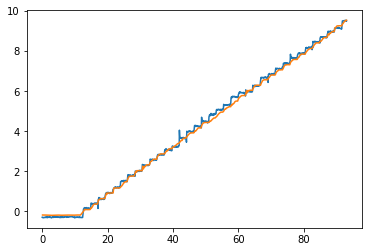

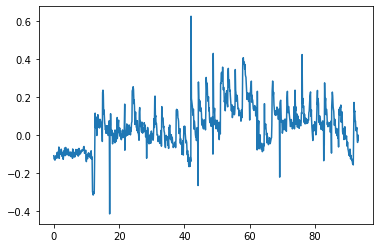

In [9]:
plotters["pose"].ltheta_dataseries.append(plotters["pose"].bfield_times[-1],plotters["pose"].ltheta_dataseries.data[-1])
lthetadata=plotters["pose"].ltheta_dataseries.find_elems_just_after_times(plotters["pose"].bfield_times)
fig, ax = plt.subplots()
plt.plot(plotters["pose"].bfield_times,np.unwrap(bfield_to_heading(plotters["pose"].bfields,res.x[0],res.x[1],res.x[2])-1.4))
#plt.plot(plotters["pose"].bfield_times,bfield_to_heading(plotters["pose"].bfields,0,0,0))
#plt.errorbar(plotters["pose"].ltheta_dataseries.times,np.unwrap(plotters["pose"].ltheta_dataseries.data),yerr=plotters["pose"].ltheta_unc_dataseries.data,label="Lidar")
plt.plot(lthetadata.times,np.unwrap(lthetadata.data))

plt.show()
fig, ax = plt.subplots()
plt.plot(plotters["pose"].bfield_times,resid(res.x))
plt.show()
